In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


# 3D Point Cloud class

The 3D Point Cloud class extracts and utilizes the [Point](Point%20Class.ipynb) Class


In [2]:
from geobipy import PointCloud3D
from os.path import join
import numpy as np
import matplotlib.pyplot as plt

nPoints = 10000

Create a quick test example using random points
$z=x(1-x)cos(4\pi x)sin(4\pi y^{2})^{2}$



In [3]:
x = -np.abs((2.0 * np.random.rand(nPoints)) - 1.0)
y = -np.abs((2.0 * np.random.rand(nPoints)) - 1.0)
z = x * (1.0 - x) * np.cos(np.pi * x) * np.sin(np.pi * y)

PC3D = PointCloud3D(x=x, y=y, z=z)

Append pointclouds together



In [4]:
x = np.abs((2.0 * np.random.rand(nPoints)) - 1.0)
y = np.abs((2.0 * np.random.rand(nPoints)) - 1.0)
z = x * (1.0 - x) * np.cos(np.pi * x) * np.sin(np.pi * y)

Other_PC = PointCloud3D(x=x, y=y, z=z)
PC3D.append(Other_PC)

In [5]:
PC3D.bounds

array([-0.9999776 ,  0.99995456, -0.99999503,  0.99980585])

In [52]:
mesh = PC3D.centred_mesh(0.1, 0.1)
mesh.x.widths

StatArray([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
           0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

StatArray([0.53333333, 0.53333333, 0.53333333])

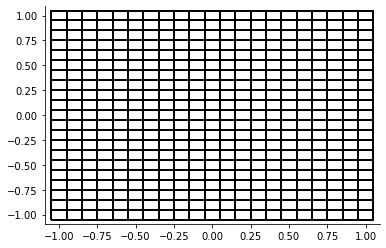

In [53]:
plt.figure()
mesh.plotGrid()

In [9]:
mesh.x.edges

StatArray([-1.00001152, -0.89474836, -0.7894852 , -0.68422205,
           -0.57895889, -0.47369573, -0.36843257, -0.26316942,
           -0.15790626, -0.0526431 ,  0.05262006,  0.15788322,
            0.26314637,  0.36840953,  0.47367269,  0.57893585,
            0.68419901,  0.78946216,  0.89472532,  0.99998848])

In [47]:
PC3D.x.max()

StatArray(0.99995456)

In [59]:
rm, k = PC3D.interpolate(mesh=mesh, method='mc', block=True, mask=0.1)

surface [WARNING]: 1 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


In [19]:
mesh = rm.pyvista_mesh()

In [20]:
mesh.save('interp.vtk')

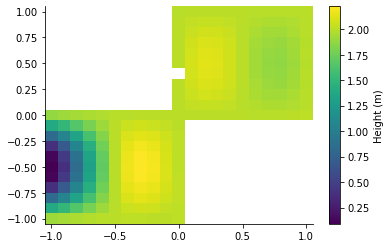

In [57]:
plt.figure()
rm.pcolor()

In [17]:
pv = PC3D.pyvista_mesh()
pv.save('pointcloud3d.vtk')

(20000, 3)
Height


In [8]:
!open pointcloud3d.vtk

Write a summary of the contents of the point cloud



In [ ]:
import pyvista as pv

print((np.vstack([self.x, self.y, self.z]).T).shape)

out = pv.PolyData(np.vstack([self.x, self.y, self.z]).T)
print(self.z.name)
out['height'] = self.z
out["elevation"] = self.elevation

In [11]:
np.vstack([PC3D.x, PC3D.y])

array([[-0.13100566, -0.53083117, -0.60033302, ...,  0.53359855,
         0.30631378,  0.00127313],
       [-0.22356953, -0.93084397, -0.12875191, ...,  0.11922724,
         0.07286384,  0.29829407]])

In [5]:
print(PC3D.summary)

3D Point Cloud: 
Number of Points: : 20000 
 Name: Easting (m)
    Shape: (20000,)
    Values: [-0.23025312 -0.3239707  -0.88467341 ...  0.79572575  0.90964689
  0.30574257]
 Name: Northing (m)
    Shape: (20000,)
    Values: [-0.17257292 -0.46854751 -0.88195112 ...  0.30527385  0.82116796
  0.89500036]
 Name: Height (m)
    Shape: (20000,)
    Values: [ 0.10956089  0.2241966  -0.56503921 ... -0.10659397 -0.04203228
  0.03940361]
 Name: Elevation (m)
    Shape: (20000,)
    Values: [0. 0. 0. ... 0. 0. 0.]



Get a single location from the point as a 3x1 vector



In [6]:
Point=PC3D.getPoint(50)
# Print the point to the screen
print(Point)

Plot the locations with Height as colour



(<AxesSubplot:xlabel='Easting (m)', ylabel='Northing (m)'>,
 <matplotlib.colorbar.Colorbar at 0x18405c7c0>)

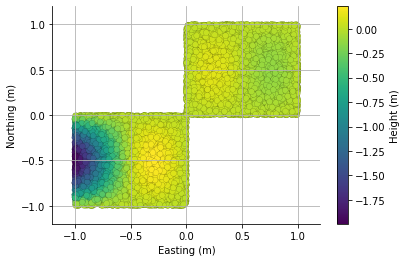

In [8]:
plt.figure()
PC3D.scatter2D(edgecolor='k')

Plotting routines take matplotlib arguments for customization

For example, plotting the size of the points according to the absolute value of height



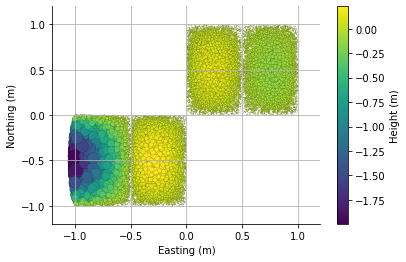

In [9]:
plt.figure()
ax = PC3D.scatter2D(s=100*np.abs(PC3D.z), edgecolor='k')

Grid the points using a triangulated CloughTocher interpolation



In [9]:
import pygmt

surface [WARNING]: 19119 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


(<AxesSubplot:xlabel='Easting (m)', ylabel='Northing (m)'>,
 <matplotlib.colorbar.Colorbar at 0x17840ebe0>)

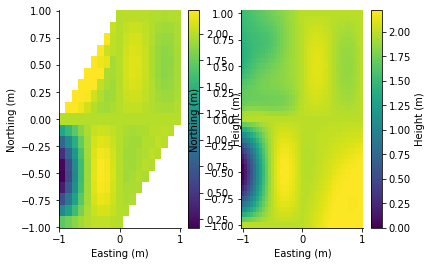

In [17]:
plt.figure()
plt.subplot(121)
PC3D.mapPlot(dx=0.1, dy=0.1, method='ct')
plt.subplot(122)
i = PC3D.block_indices(0.05, 0.05)
PC3D.mapPlot(dx=0.05, dy=0.05, method='mc')#, i=i)

We can perform spatial searches on the 3D point cloud



In [ ]:
PC3D.setKdTree(nDims=2)
p = PC3D.nearest((0.0,0.0), k=200, p=2, radius=0.3)
print(p)

.nearest returns the distances and indices into the point cloud of the nearest points.
We can then obtain those points as another point cloud



In [ ]:
pNear = PC3D[p[1]]
plt.figure()
ax1 = plt.subplot(1,2,1)
pNear.scatter2D()
plt.plot(0.0, 0.0, 'x')
plt.subplot(1,2,2, sharex=ax1, sharey=ax1)
ax, sc, cb = PC3D.scatter2D(edgecolor='k')
searchRadius = plt.Circle((0.0, 0.0), 0.3, color='b', fill=False)
ax.add_artist(searchRadius)
plt.plot(0.0, 0.0, 'x')

Read in the xyz co-ordinates in columns 2,3,4 from a file. Skip 1 header line.



In [ ]:
dataFolder = "..//supplementary//Data//"

PC3D.read(fileName=dataFolder + 'Resolve1.txt')

In [ ]:
plt.figure()
f = PC3D.scatter2D(s=10)

Export the 3D Pointcloud to a VTK file.

In this case, I pass the height as point data so that the points are coloured
when opened in Paraview (or other software)



In [10]:
# PC3D.toVTK('testPoints', format='binary')

In [17]:
PCsub = PC3D.block_median(0.1, 0.1)

<IPython.core.display.Javascript object>


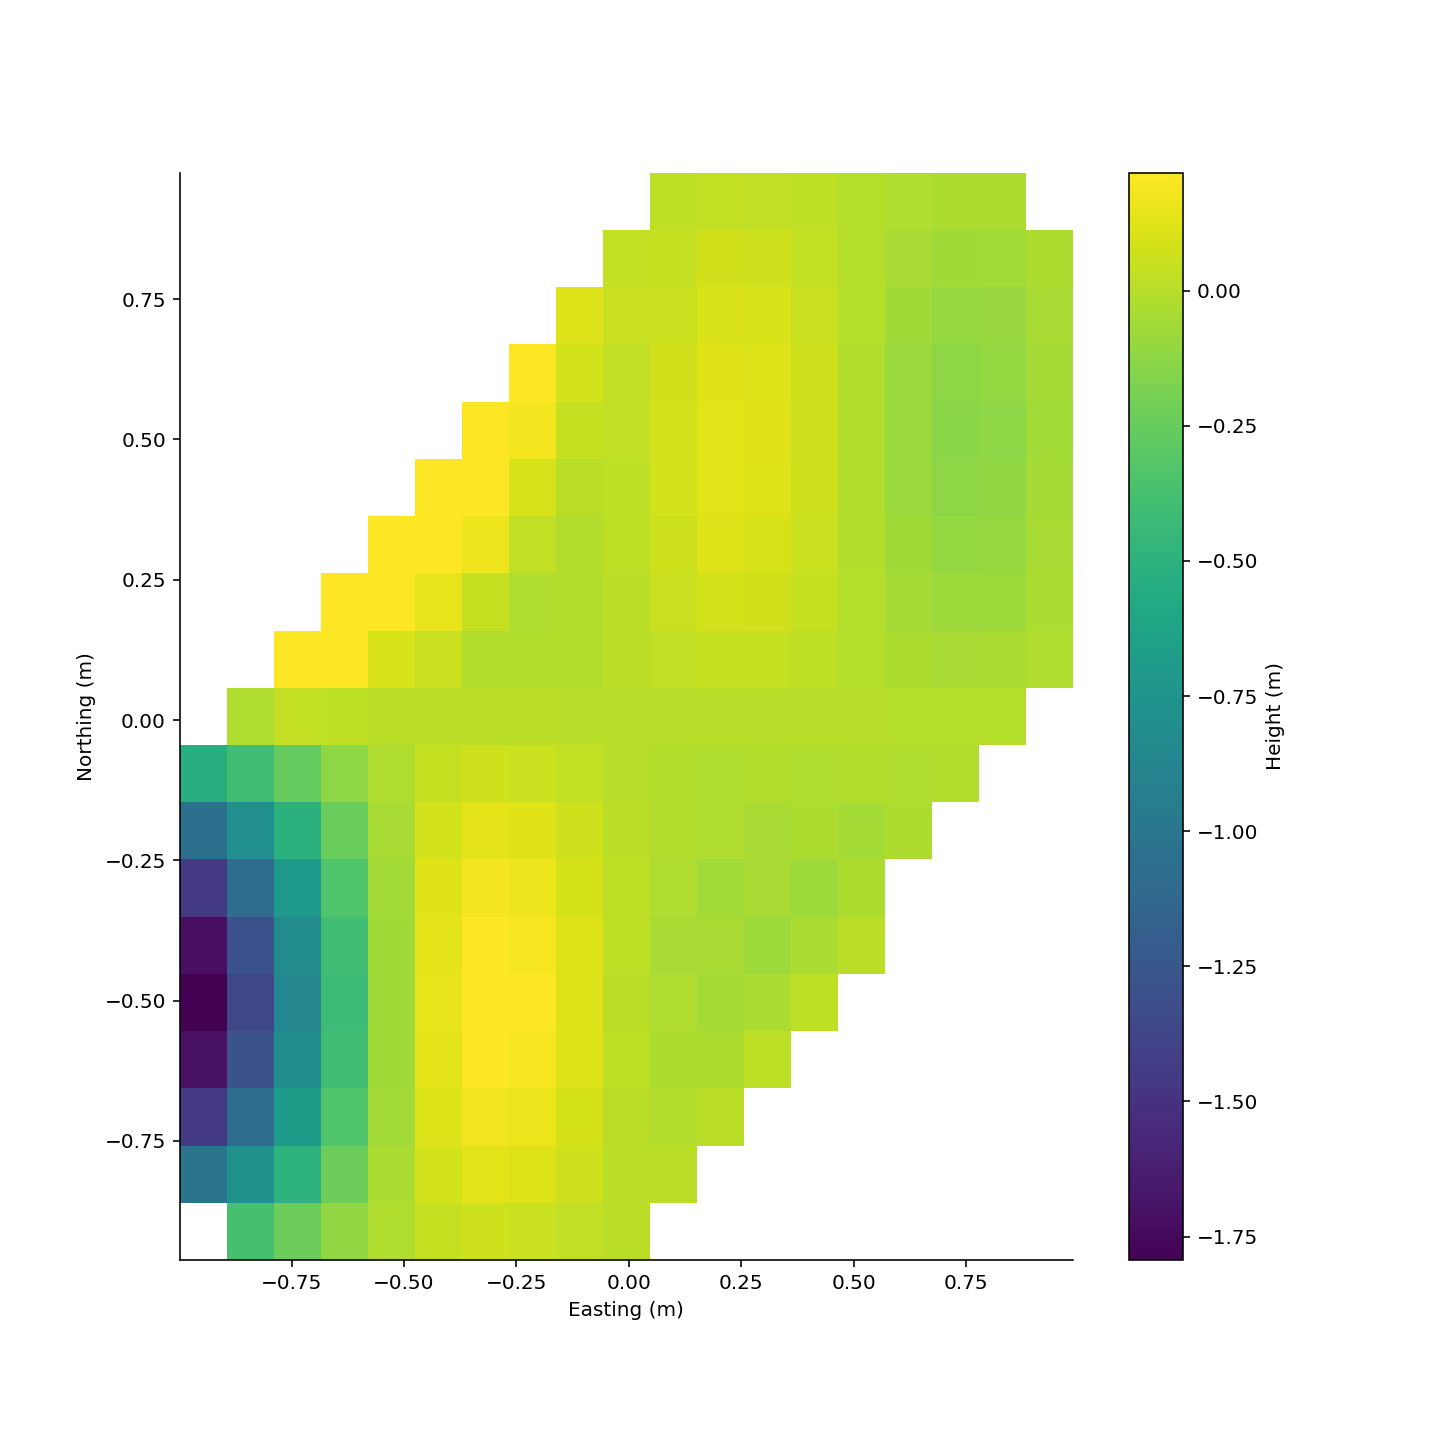

(<AxesSubplot:xlabel='Easting (m)', ylabel='Northing (m)'>,
 <matplotlib.colorbar.Colorbar at 0x171d125b0>)

In [18]:
%matplotlib notebook
plt.figure(figsize=(10, 10))
# PC3D.scatter2D(noColorbar=True)
# PCsub.scatter2D(c='k', marker='.',noColorbar=True, s=100)
PCsub.mapPlot(0.1, 0.1)

In [9]:
from geobipy import StatArray
from geobipy import RectilinearMesh3D
import matplotlib.pyplot as plt
import numpy as np


#%%
# Specify some cell centres in x and y
x = StatArray(np.arange(11.0), 'Easting', 'm')
y = StatArray(np.arange(11.0), 'Northing', 'm')
z = StatArray(np.arange(11.0), 'Depth', 'm')

rm = RectilinearMesh3D(xEdges=x, yEdges=y, zEdges=y)

In [13]:
pv_mesh  = rm.pyvista_mesh()

In [11]:
pv_mesh.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [14]:
pv_mesh.save('test.vtk')

In [15]:
!open test.vtk

In [38]:
pv_mesh.sh

/Users/nfoks/codes/repositories/geobipy/documentation_source/source/examples/Data
